# Visualize Data

This notebook visualizes collected AC data available from different AClib2 scenarios. Uncomment one scenario in the next cell but one and rerun whole notebook.

In [31]:
import itertools
import os
import sys

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.stats

sys.path.append("../")
from helper import load_data, data_source_release

sc_dict = data_source_release.get_sc_dict()
data_dir = data_source_release.get_data_dir()

%matplotlib inline
plt.style.use('seaborn-v0_8-deep')
#plt.style.use('seaborn-deep')
dpi=300

c = [cm.summer(x) for x in np.linspace(0, 1, 100)]
np.random.shuffle(c)
green_colors = itertools.cycle(c)

c = [cm.autumn(x) for x in np.linspace(0, 1, 100)]
np.random.shuffle(c)
red_colors = itertools.cycle(c)

In [32]:
# Choose a scenario
#SCENARIO="lpg-zeno"
#SCENARIO="saps-CVVAR"
#SCENARIO="spear_qcp"
#SCENARIO="spear_swgcp"
#SCENARIO="yalsat_qcp"
#SCENARIO="yalsat_swgcp"
SCENARIO="clasp_factoring"

In [33]:
data, _, sat_ls = load_data.get_data(scenario=SCENARIO, data_dir=data_dir, sc_dict=sc_dict, 
                                retrieve=sc_dict[SCENARIO]['use'])

print(data.max())
print(data.shape)

Train data loaded
Test data loaded
/Users/gurmehersinghpuri/Freiburg/DL_LAB/Project/DistNet/notebooks/../data/clasp-3.0.4-p8_rand_factoring/features.txt
(2000, 113) (2000, 100)
Discarding 0 (2000) instances because of CRASHED
Discarding 0 (2000) instances because of TIMEOUT
Discarding 0 (2000) instances because not stated TIMEOUTS
Discarding 0 (2000) instances because of constant features
Discarding 0 (2000) instances because of UNSAT
(2000, 113)
0.0877
(2000, 100)


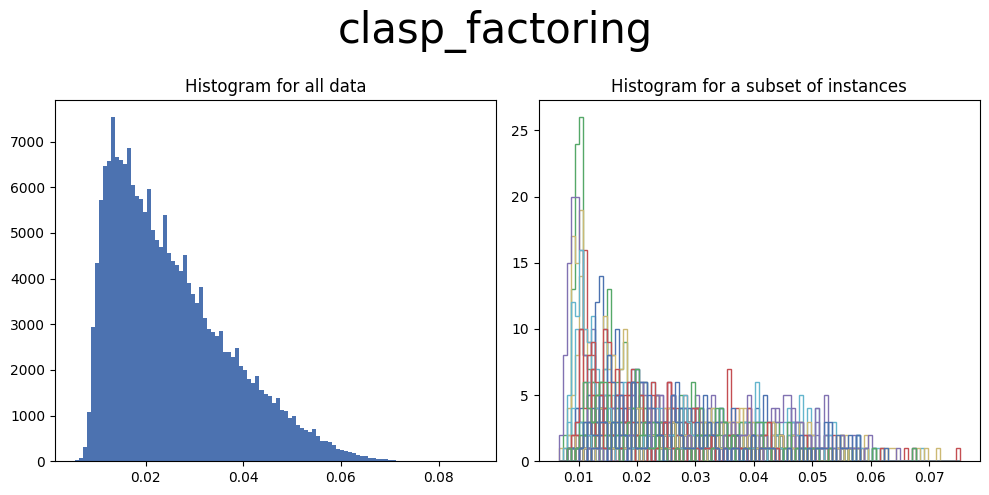

In [34]:
# Distribution of all values and for each instance
plt.figure(figsize=(10,5))
plt.suptitle("%s\n" % SCENARIO, fontsize=30)

plt.subplot(121)
plt.hist(data.reshape([-1,1]), bins=100)
plt.title("Histogram for all data")

plt.subplot(122)
plt.hist([i for i in data[::50, :]], histtype="step", bins=100)
plt.title("Histogram for a subset of instances")

plt.tight_layout()
plt.subplots_adjust(top=0.80)
#plt.savefig("./plots/%s_histogram.png" % SCENARIO, dpi=dpi)
plt.show()

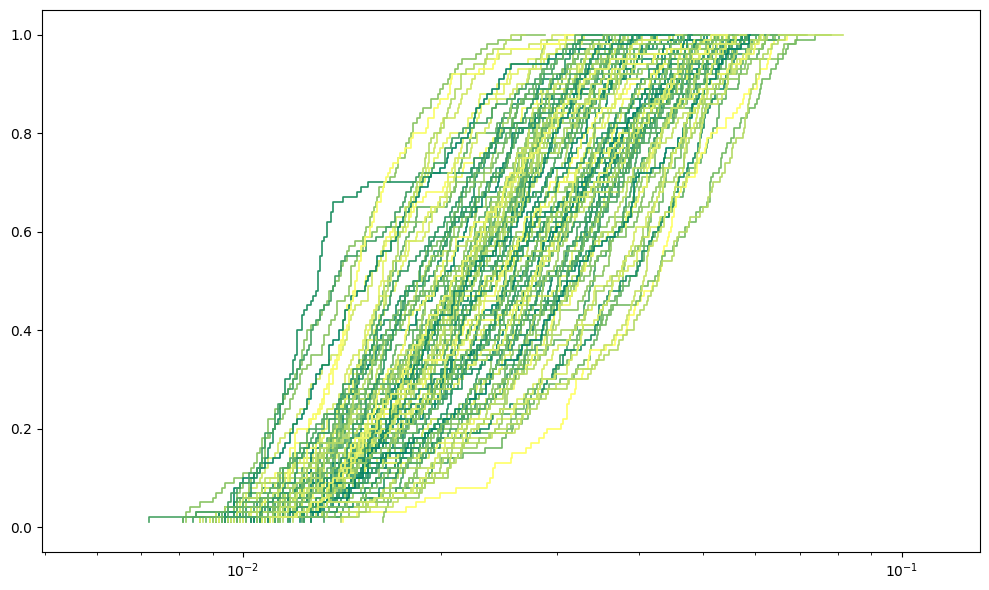

In [35]:
# # CDFs for each instance
# from sklearn.model_selection import KFold

# plt.figure(figsize=(10,6))

# for i in range(0, data.shape[0], 1):
#     sorted = np.sort(data[i, :])
#     yvals = np.arange(1,len(sorted)+1)/float(len(sorted))
#     if sat_ls[i].count("UNSAT") > 1:
#         plt.step(sorted, yvals, c=next(red_colors), linewidth=2)
#     elif sat_ls[i].count("SAT") > 1:
#         plt.step(sorted, yvals, c=next(green_colors), linewidth=2)
#     else:
#         pass
#         #plt.step(sorted, yvals, linewidth=2)
#     #print(np.std(sorted))

# # Insert dummy points for legend
# plt.scatter(-1, 1, c='r', label="UNSAT")
# plt.scatter(-1, 1, c='g', label="SAT")
# plt.scatter(-1, 1, c='k', label="timeout")

# #plt.legend(loc="upper left")
# plt.xlim([max(0.001, np.min(data)*0.9), np.max(data)*1.5])
# plt.ylim([-0.1, 1.1])
# #plt.title("CDF for single instances", fontsize=15)
# plt.tight_layout()
# plt.xscale('log')
# #plt.savefig("./plots/%s_CDF.png" % SCENARIO, dpi=dpi)

# CDFs for *a subset* of instances
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# --- choose 100 distinct rows -------------------------------
np.random.seed(0)                       # for repeatability
subset_idx = np.random.choice(data.shape[0], 100, replace=False)
# ------------------------------------------------------------

for i in subset_idx:
    sorted_rt = np.sort(data[i])
    yvals     = np.arange(1, len(sorted_rt)+1) / float(len(sorted_rt))

    if sat_ls[i].count("UNSAT") > 1:
        plt.step(sorted_rt, yvals, c=next(red_colors),  lw=1.2)
    elif sat_ls[i].count("SAT") > 1:
        plt.step(sorted_rt, yvals, c=next(green_colors), lw=1.2)
    else:
        plt.step(sorted_rt, yvals, color="steelblue", lw=1.0)

# dummy points for legend (optional)
plt.scatter(-1, 1, c='r', label="UNSAT")
plt.scatter(-1, 1, c='g', label="SAT")
plt.scatter(-1, 1, c='k', label="timeout")

plt.xscale('log')
plt.xlim([max(0.001, np.min(data)*0.9), np.max(data)*1.5])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
# plt.savefig(f"../results/{SCENARIO}_CDF_subset.png", dpi=dpi)
plt.show()

In [ ]:
# Sort data by mean across an instance and scatter all measurements 
s_idx = np.argsort(np.mean(data, axis=1))
plt.figure(figsize=(10, 10))
plt.grid(True)

# First Plot: Mean
ax = plt.subplot(511)

for i in range(data.shape[0]):
    plt.scatter([i]*100, data[s_idx[i], :], marker=".", s=10)
plt.plot(list(range(data.shape[0])), np.mean(data[s_idx], axis=1), linewidth=2)
m = np.nanmean(np.mean(data[s_idx], axis=1))
plt.plot([-1, data.shape[0]*3], [m, m], c='r', zorder=99)
ax.annotate('%3.2g' % m, xy=(2, m*1.2), color='r', zorder=99)

plt.xlim([-0.5, data.shape[0]+0.5])
plt.yscale("log")
plt.ylabel("MEAN")

# Second Plot: Standard Deviation
ax = plt.subplot(512)

plt.plot(list(range(data.shape[0])), np.std(data[s_idx, :], axis=1), linewidth=2)
m = np.nanmean(np.std(data[s_idx, :], axis=1))
plt.plot([-1, data.shape[0]*3], [m, m], c='r', zorder=99)
ax.annotate('%3.2g' % m, xy=(2, m*1.2), color='r', zorder=99)

plt.xlim([-0.5, data.shape[0]+0.5])
plt.yscale("log")
plt.ylabel("STD")

# Fifth Plot: Variation Coefficient
ax = plt.subplot(513)

coef = np.mean(data[s_idx, :], axis=1)/np.std(data[s_idx, :], axis=1)**2
plt.plot(list(range(data.shape[0])), coef, linewidth=2)
m = np.nanmean(coef)
plt.plot([-1, data.shape[0]*3], [m, m], c='r', zorder=99)
ax.annotate('%3.2g' % m, xy=(2, m*1.2), color='r', zorder=99)

plt.xlim([-0.5, data.shape[0]+0.5])
plt.yscale("log")
plt.ylabel("Variation Coefficient")

# Third Plot: Negative Log Likelihood
ax = plt.subplot(514)

nll = list()
for d in data:
    nll.append(-np.sum(scipy.stats.norm.logpdf(x=d, loc=np.mean(d), scale=np.std(d))))
nll = np.array(nll)
nll_mean = np.nanmean(nll)

plt.plot(list(range(data.shape[0])), nll[s_idx], linewidth=2)
plt.plot([-1, data.shape[0]*3], [nll_mean, nll_mean], c='r', zorder=99)
ax.annotate('%3.2g' % nll_mean, xy=(2, nll_mean+np.abs(nll_mean)*0.1), color='r', zorder=99)

plt.ylabel("neg. llh")
plt.xlim([-0.5, data.shape[0]+0.5])

# Forth Plot: SAT/UNSAT
ax = plt.subplot(515)
for idx, i in enumerate(s_idx):
    if sat_ls[i].count("SAT") > 1:
        plt.scatter(idx, 0, c="g", marker="v")
    elif sat_ls[i].count("UNSAT") > 1:
        plt.scatter(idx, 1, c="y", marker="x")
    else:
        plt.scatter(idx, 2, c="k", marker="^")
# Insert some dummy points
#plt.scatter(-1, 0, c="k", marker="^", edgecolor="", label="TIMEOUT")
#plt.scatter(-1, 0, c="y", facecolor="", marker="x", label="UNSAT")
#plt.scatter(-1, 0, c="g", marker="v", edgecolor="", label="SAT")

plt.legend(loc="upper left")
plt.xlim([-0.5, data.shape[0]+0.5])
plt.ylim([-0.5, 2.5])

plt.tight_layout()
#plt.savefig("./plots/%s_scatter.png" % SCENARIO, dpi=dpi)
plt.show()

/Users/gurmehersinghpuri/my_tmp_dir/ipykernel_49685/1727681123.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
